In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import describe


In [2]:
df= pd.read_csv('./data/challenge.csv')



In [3]:
df

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36
...,...,...,...,...,...,...,...,...,...,...,...
5611,5615,4715,2189,MMM2,27231,Hong Kong SAR,6:02:53,5:58:21,1:14:27,2:38:21,3:55:21
5612,5618,4717,2191,MMM2,26569,Hong Kong SAR,6:02:58,5:58:49,1:18:44,2:48:40,4:15:01
5613,5625,903,324,MFM1,33067,Hong Kong SAR,6:03:50,5:59:34,1:24:31,2:53:27,4:10:01
5614,5633,906,371,MFM2,36256,China,6:04:56,5:59:42,1:26:10,3:03:20,4:25:26


In [4]:
def time_to_minuts(x):
    x = x.split(':')
    return int(x[0]) * 60 + int(x[1]) + int(x[2]) /60  
    
df= pd.read_csv('./data/challenge.csv')
df = df.dropna()
name_of_columns = ['Official Time' , 'Net Time', '10km Time','Half Way Time','30km Time']
df['0-10km pace'] = df['10km Time'].apply(lambda x : time_to_minuts(x) /10 )
df['10-21.0975km pace'] = (df['Half Way Time'].apply(time_to_minuts) - df['10km Time'].apply(time_to_minuts)) /11.0975
df['21.0975-30km pace'] = (df['30km Time'].apply(time_to_minuts) - df['Half Way Time'].apply(time_to_minuts))/8.9025
df['30-42.195km pace'] = (df['Net Time'].apply(time_to_minuts) - df['30km Time'].apply(time_to_minuts) )/12.195
for name in name_of_columns:
    df[name] = df[name].apply(time_to_minuts)


In [5]:
df

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time,0-10km pace,10-21.0975km pace,21.0975-30km pace,30-42.195km pace
0,1,1,1,MMS,21080,Kenya,132.200000,132.183333,30.583333,64.800000,93.600000,3.058333,3.083277,3.235046,3.163865
1,2,2,1,MMI,14,Kenya,132.233333,132.216667,30.566667,64.800000,93.600000,3.056667,3.084779,3.235046,3.166598
2,3,3,2,MMI,2,Ethiopia,132.333333,132.300000,30.583333,64.816667,93.600000,3.058333,3.084779,3.233174,3.173432
3,4,4,2,MMS,21077,Kenya,132.483333,132.450000,30.583333,64.800000,93.600000,3.058333,3.083277,3.235046,3.185732
4,5,5,3,MMI,18,Ethiopia,132.783333,132.766667,30.566667,64.800000,93.600000,3.056667,3.084779,3.235046,3.211699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,5615,4715,2189,MMM2,27231,Hong Kong SAR,362.883333,358.350000,74.450000,158.350000,235.350000,7.445000,7.560261,8.649256,10.086101
5612,5618,4717,2191,MMM2,26569,Hong Kong SAR,362.966667,358.816667,78.733333,168.666667,255.016667,7.873333,8.103927,9.699523,8.511685
5613,5625,903,324,MFM1,33067,Hong Kong SAR,363.833333,359.566667,84.516667,173.450000,250.016667,8.451667,8.013817,8.600580,8.983190
5614,5633,906,371,MFM2,36256,China,364.933333,359.700000,86.166667,183.333333,265.433333,8.616667,8.755726,9.222129,7.729944


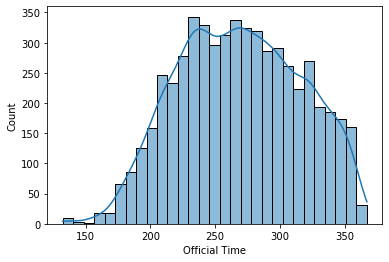

In [6]:
sns.histplot(df['Official Time'],kde=True)

In [7]:
df['pace'] = df['Official Time'].apply(lambda x : x /42.195)
df['netto pace'] = df['Net Time'].apply(lambda x : x /42.195)
df['10km pace'] = df['10km Time'].apply(lambda x : x /10)
df['half pace'] = df['Half Way Time'].apply(lambda x : x/21.0975)  
df['30km pace'] = df['30km Time'].apply(lambda x :x /30)

In [8]:
df.describe()


,Overall Position,Gender Position,Category Position,Race No,Official Time,Net Time,10km Time,Half Way Time,30km Time,0-10km pace,10-21.0975km pace,21.0975-30km pace,30-42.195km pace,pace,netto pace,10km pace,half pace,30km pace
count,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000
mean,2809.354637,2051.313104,754.725743,26182.265306,268.998607,267.095005,61.262994,126.592317,183.064745,6.126299,5.886850,6.343435,6.890550,6.375130,6.330016,6.126299,6.000347,6.102158
std,1621.695388,1433.990180,589.631852,4389.821435,46.973454,46.255230,9.792880,19.817829,30.406378,0.979288,0.939039,1.278329,1.443734,1.113247,1.096225,0.979288,0.939345,1.013546
min,1.000000,1.000000,1.000000,2.000000,132.200000,132.183333,30.566667,64.800000,93.600000,3.056667,3.083277,3.203220,3.163865,3.133073,3.132678,3.056667,3.071454,3.120000
25%,1404.250000,702.000000,237.250000,23536.250000,233.033333,231.825000,54.466667,112.283333,160.483333,5.446667,5.191860,5.371150,5.718874,5.522771,5.494134,5.446667,5.322116,5.349444
50%,2811.500000,1906.500000,633.000000,26327.500000,268.358333,266.275000,61.350000,126.100000,181.700000,6.135000,5.830142,6.187401,6.793085,6.359956,6.310582,6.135000,5.977011,6.056667
75%,4212.750000,3310.750000,1192.750000,27936.750000,305.379167,302.962500,68.416667,141.612500,206.316667,6.841667,6.569047,7.231583,7.999180,7.237331,7.180057,6.841667,6.712288,6.877222
max,5646.000000,4717.000000,2191.000000,36452.000000,367.066667,359.700000,96.083333,183.816667,265.433333,9.608333,8.946459,12.736123,11.907886,8.699293,8.524707,9.608333,8.712723,8.847778


In [9]:
for name in ['10km pace','half pace','30km pace','netto pace','pace']:
    print(name , describe(df[name]) )

10km pace DescribeResult(nobs=5586, minmax=(3.0566666666666666, 9.608333333333333), mean=6.126299379400883, variance=0.9590049158070353, skewness=-0.10480396214472282, kurtosis=-0.42488975199427115)
half pace DescribeResult(nobs=5586, minmax=(3.0714539637397795, 8.712722676462455), mean=6.000346823191349, variance=0.8823688567671293, skewness=-0.03255014104743067, kurtosis=-0.5172890575305971)
30km pace DescribeResult(nobs=5586, minmax=(3.1199999999999997, 8.847777777777777), mean=6.102158173210806, variance=1.0272753689752305, skewness=0.039859216809538245, kurtosis=-0.6289037287629382)
netto pace DescribeResult(nobs=5586, minmax=(3.1326776474305804, 8.524706718805545), mean=6.330015531948556, variance=1.2017101095768896, skewness=-0.0046978986339609955, kurtosis=-0.7781963050426306)
pace DescribeResult(nobs=5586, minmax=(3.1330726389382626, 8.699292965201249), mean=6.375129911971483, variance=1.2393187374509107, skewness=-0.016440749990716628, kurtosis=-0.7765114854275881)


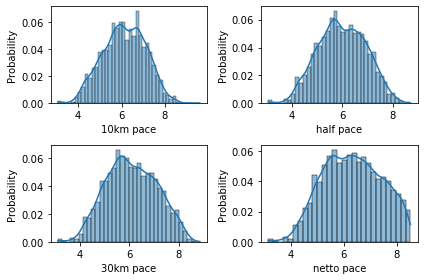

In [10]:
name_of_columns = ['10km pace','half pace','30km pace','netto pace']
fig , axes = plt.subplots(2,2)

for index ,ax in enumerate(axes.ravel()):
    sns.histplot(df[name_of_columns[index]],kde=True,stat='probability',ax=ax)

plt.tight_layout()

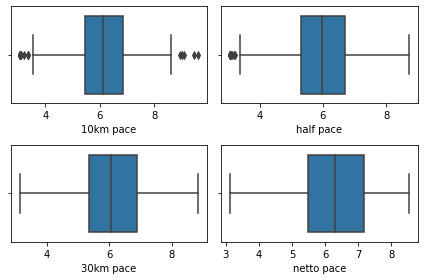

In [11]:
fig , axes = plt.subplots(2,2)

for index ,ax in enumerate(axes.ravel()):
    sns.boxplot(x=df[name_of_columns[index]],ax=ax)

plt.tight_layout()

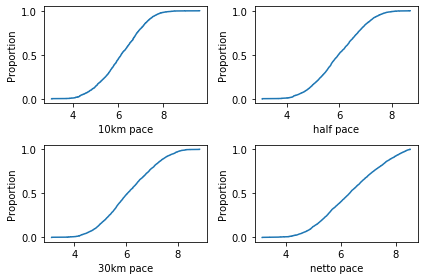

In [12]:
name_of_columns = ['10km pace','half pace','30km pace','netto pace']
fig , axes = plt.subplots(2,2)

for index ,ax in enumerate(axes.ravel()):
    sns.ecdfplot(df[name_of_columns[index]],ax=ax)

plt.tight_layout()

0-10km pace DescribeResult(nobs=5586, minmax=(3.0566666666666666, 9.608333333333333), mean=6.126299379400883, variance=0.9590049158070353, skewness=-0.10480396214472282, kurtosis=-0.42488975199427115)
10-21.0975km pace DescribeResult(nobs=5586, minmax=(3.0832770143425696, 8.946459412780657), mean=5.886850489594114, variance=0.8817947976314793, skewness=0.15091885181441095, kurtosis=-0.4730843579323012)
21.0975-30km pace DescribeResult(nobs=5586, minmax=(3.203220069268932, 12.73612281194421), mean=6.3434347760791505, variance=1.6341258141511827, skewness=0.4252614012501433, kurtosis=-0.29078964643242644)
30-42.195km pace DescribeResult(nobs=5586, minmax=(3.163864971983054, 11.907885745524121), mean=6.890550239790499, variance=2.084369088793235, skewness=0.1982852418466139, kurtosis=-0.6836369605244652)


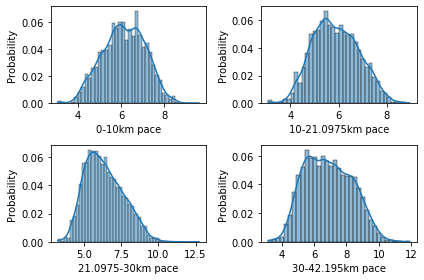

In [22]:
segments = [ '0-10km pace' , '10-21.0975km pace', '21.0975-30km pace', '30-42.195km pace']
means = []
variances = []
skewnesses = []
kurtosises = []
for segment in segments:
    print(segment,describe(df[segment]))
    means.append(describe(df[segment])[2])
    variances.append(describe(df[segment])[3])
    skewnesses.append(describe(df[segment])[4])
    kurtosises.append(describe(df[segment])[5])


fig , axes = plt.subplots(2,2)

for index ,ax in enumerate(axes.ravel()):
    sns.histplot(df[segments[index]],kde=True,stat='probability',ax=ax)

plt.tight_layout()

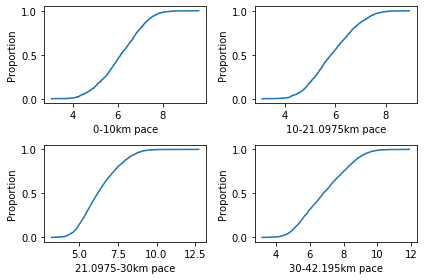

In [14]:
fig , axes = plt.subplots(2,2)
for index ,ax in enumerate(axes.ravel()):
    sns.ecdfplot(df[segments[index]],ax=ax)

plt.tight_layout()

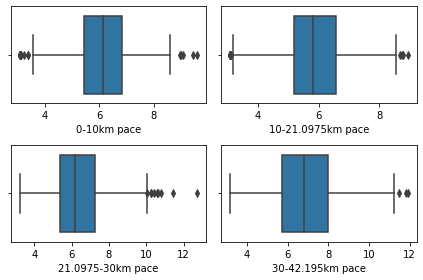

In [15]:
fig , axes = plt.subplots(2,2)
for index ,ax in enumerate(axes.ravel()):
    sns.boxplot(x=df[segments[index]],ax=ax)

plt.tight_layout()

In [16]:
df.Category.unique()

array(['MMS', 'MMI', 'MMM1', 'MFI', 'MFS', 'MMM2', 'MFM1', 'MFM2'],
      dtype=object)